# Section 2.7 — Random variable generation

This notebook contains the code examples from [Section 2.7 Random variable generation]() of the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
random.seed(16)
np.random.seed(16)

## Why simulate?

Running simulations of random variables is super useful:

- fake data generation
- probability calculations
- statistical procedures

(see book)


General procedure to simulate $\mathbb{E}_X(g)$:

```Python
n = 30

gvalues = []
for i in range(0,n):
    xi = gen_x()
    gi = g(xi)
    gvalues.append(gi)

expg = sum(gvalues) / n
```

We'll see different variations of this procedure (for loop that generates many random observations and does something with them).

## Random variable generation using a computer

In [4]:
import random

random.random()

0.36152277491407514

In [5]:
# # ALT.
# import numpy as np
# np.random.rand()

### Discrete random variable generation

Splitting up the uniform random variable ...

#### Example 1: generating Bernoulli observations

Consider the Bernoulli random variable $B \sim \textrm{Bernoulli}(p)$,
which corresponds to a coin toss with probability of heads (outcome 1) equal to $p$,
and probability of tails (outcome 0) $(1-p)$.

The function `gen_b` defined below is a generator of observations from the random variable $B$.

In [6]:
def gen_b(p=0.5):
    u = random.random()
    if u < p:
        return 1
    else:
        return 0

To generate a random observation from $B \sim \textrm{Bernoulli}(p=0.3)$,
we simply need to call the function `gen_b` with the keyword argument `p=0.3`.

In [7]:
gen_b(p=0.3)

0

Let's now generates `n=1000` observations from $B \sim \textrm{Bernoulli}(p=0.3)$,
and compute the proportion of the outcome $1$ (heads) in the list.

In [8]:
n = 1000
bsample = [gen_b(p=0.3) for i in range(0,n)]
bsample.count(1) / n

0.316

In [9]:
# # ALT. Use regular for-loop, instead of list comprehension syntax
# n = 1000
# bsample = []
# for i in range(0,n):
#     b = gen_b(p=0.3)
#     bsample.append(b)
# bsample.count(1) / n

### Continuous random variable generation

See the book or explanations of the the invers-CDF trick.


#### Example 2: generating observations from a shifted uniform distribution



$V \sim \mathcal{U}(\alpha=100,\beta=120)$




In [10]:
def gen_v():
    u = random.random()
    v = 100 + 20*u
    return v

In [11]:
gen_v()

107.26199234069637

In [12]:
n = 100
vsample = [gen_v() for i in range(0,n)]

In [13]:
vsample[0:3]  # first three observations

[103.6386436977451, 117.34140363667541, 113.35634072970831]

In [14]:
min(vsample), max(vsample)  # Range

(100.32987267319582, 119.88187770589093)

<AxesSubplot:ylabel='Density'>

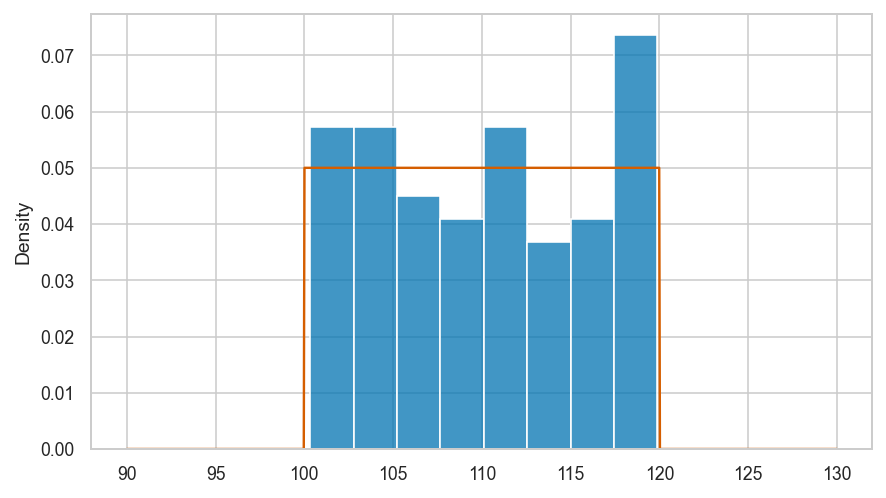

In [15]:
# plot a histogram of data in `vsample`
sns.histplot(vsample, stat="density")

# plot the pdf of the model
from scipy.stats import uniform
rvV = uniform(100,20)
xs = np.linspace(90,130,1000)
sns.lineplot(x=xs, y=rvV.pdf(xs), color="r")

In [16]:
# filename = "figures/prob/generate_vsample_and_pdf_rvV.pdf"
# from scipy.stats import uniform
# with plt.rc_context({"figure.figsize":(4,2)}):
#     ax = sns.histplot(vsample, stat="density", alpha=0.5, binwidth=2)
#     xs = np.linspace(90,130,1000)
#     sns.lineplot(x=xs, y=uniform(100,20).pdf(xs), ax=ax, color="r")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Example 3: generating observations from an exponential distribution

In [17]:
def gen_e(lam):
    u = random.random()
    e = -1 * np.log(1-u) / lam
    return e

Where `lam` is the $\lambda$ (lambda) parameter chosen for exponential model family.

In [18]:
np.random.seed(6)

n = 1000  # number of observations to generate
esample = [gen_e(lam=0.2) for i in range(0,n)]

In [19]:
esample[0:3]  # first three observations

[0.5024273707608603, 10.625297726488984, 2.731193337322976]

<AxesSubplot:ylabel='Density'>

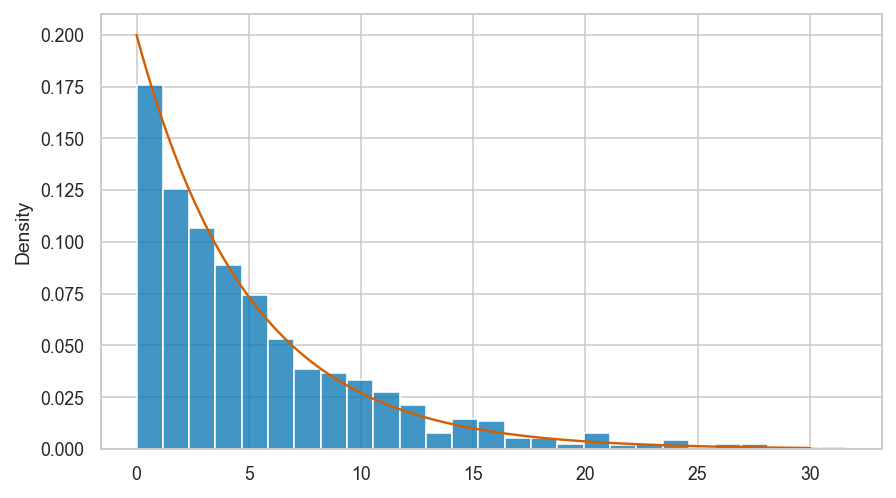

In [20]:
# plot a histogram of data in `esample`
sns.histplot(esample, stat="density")

# plot the pdf of the model
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)
xs = np.linspace(0,30,1000)
sns.lineplot(x=xs, y=rvE.pdf(xs), color="r")

In [21]:
# filename = "figures/prob/generate_exp_and_pdf_rvE.pdf"
# with plt.rc_context({"figure.figsize":(4,2)}):
#     ax = sns.histplot(esample, stat="density", alpha=0.5)
#     es = np.linspace(0,30,1000)
#     sns.lineplot(x=xs, y=rvE.pdf(es), ax=ax, color="r")
#     ax.set_xlim([0,30])
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

We'll develop various way to analyze this "goodness of fit" between the sample `esample` data we generated
and the theoretical model $f_E$ in the remainder of this notebook.

## Empirical distributions

Let's write a function that compute the value empirical cumulative distribution (eCDF) 
of the sample `data`. The function takes two inputs: `data` the sample of observations,
and `b`, the value where we want to evaluate the function.

In [22]:
def ecdf(data, b):
    sdata = np.sort(data)
    count = sum(sdata <= b)    # num. of obs. <= b
    return count / len(data)   # proportion of total

Note the sorting step is not strictly necessary,
but it guarantees the `sdata` is a NymPy `array` object which allows the comparison to work.

In [23]:
ecdf(vsample, 110)

0.48

In [24]:
ecdf(esample, 5)

0.606

### Visualizing the empirical cumulative distribution

<AxesSubplot:ylabel='Proportion'>

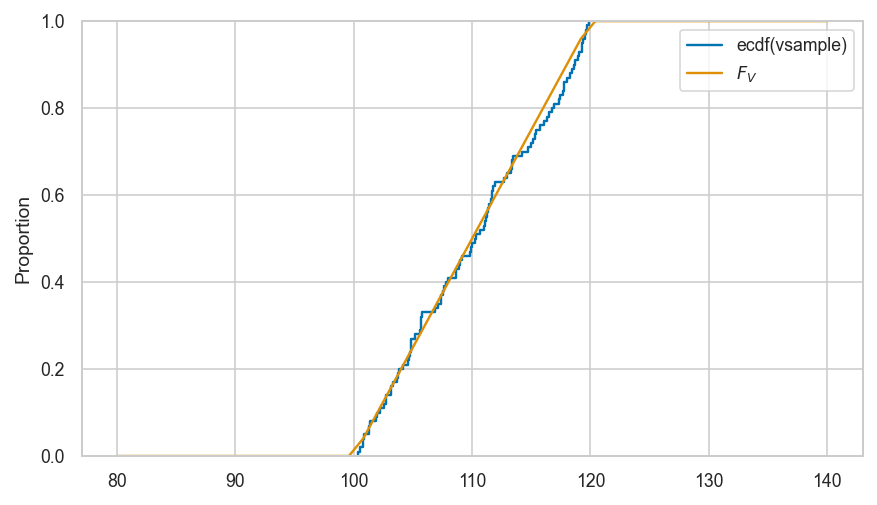

In [25]:
sns.ecdfplot(vsample, label="ecdf(vsample)")

from scipy.stats import uniform
rvV = uniform(100,20)
bs = np.linspace(80,140)
sns.lineplot(x=bs, y=rvV.cdf(bs), label="$F_V$")

In [26]:
# filename = "figures/prob/ecdf_vsample_and_cdf_plot_rvV.pdf"
# with plt.rc_context({"figure.figsize":(5,3)}):
#     ax = sns.ecdfplot(vsample, label="eCDF(vsample)")
#     bs = np.linspace(80,140)
#     sns.lineplot(x=bs, y=rvV.cdf(bs), ax=ax, label="$F_V$")
#     ax.figure.tight_layout()
#     ax.set_ylim([-0.05,1.05])
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

In [27]:
# # ALT. manually plot ecdf using lineplot
# bs = np.linspace(80,140,1000)
# empFvs = [ecdf(vsample,b) for b in bs]
# sns.lineplot(x=bs, y=empFvs, drawstyle='steps-post')

<AxesSubplot:ylabel='Proportion'>

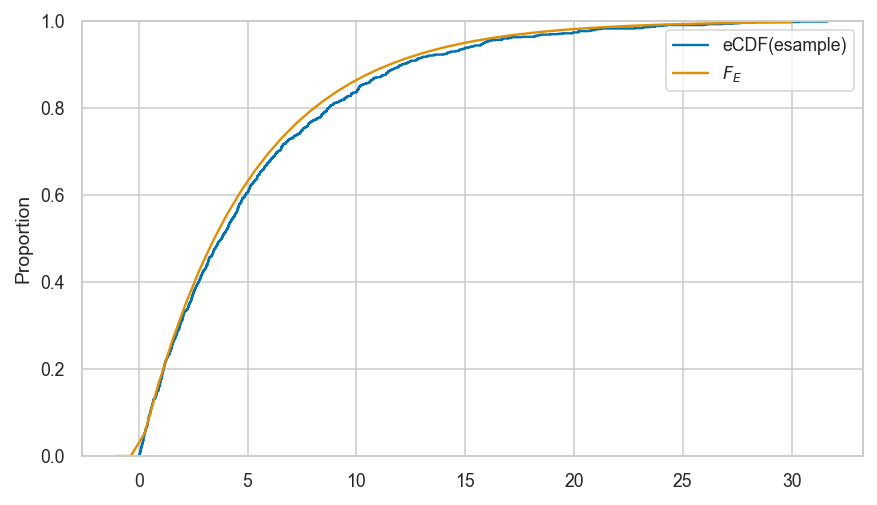

In [28]:
sns.ecdfplot(esample, label="eCDF(esample)")

bs = np.linspace(-1,30)
sns.lineplot(x=bs, y=rvE.cdf(bs), label="$F_E$")

In [29]:
# filename = "figures/prob/ecdf_esample_and_cdf_plot_rvE.pdf"
# with plt.rc_context({"figure.figsize":(5,3)}):
#     ax = sns.ecdfplot(esample, label="eCDF(esample)")
#     bs = np.linspace(-1,30)
#     sns.lineplot(x=bs, y=rvE.cdf(bs), ax=ax, label="$F_E$")
#     ax.figure.tight_layout()
#     ax.set_ylim([-0.05,1.05])
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

## Measuring data-model fit

Want to measure if `vsample` comes from $\mathcal{U}(100,120)$.
Here are the first five values we simulated:

In [30]:
vsample[0:3]

[103.6386436977451, 117.34140363667541, 113.35634072970831]

We also want to check if the data we generated `esample` comes from $\textrm{Expon}(\lambda=0.2)$.

In [31]:
esample[0:3]

[0.5024273707608603, 10.625297726488984, 2.731193337322976]

Let's also generate an additional sample `nsample`
from the normal distribution $\mathcal{N}(1000,100)$
so we'll be able to make a variety of comparisons.

In [32]:
np.random.seed(6)

In [33]:
from scipy.stats import norm
rvN = norm(1000, 100)
nsample = rvN.rvs(100)
nsample[0:3]

array([ 968.82163265, 1072.90039236, 1021.78207881])

### Visual comparison between data and model distributions



#### Shifted uniform distribution

Here is the code for comparison of `vsample` and the theoretical model `rvV` $= \mathcal{U}(100,120)$.

In [34]:
from scipy.stats import uniform
rvV = uniform(100,20)

(-0.05, 1.05)

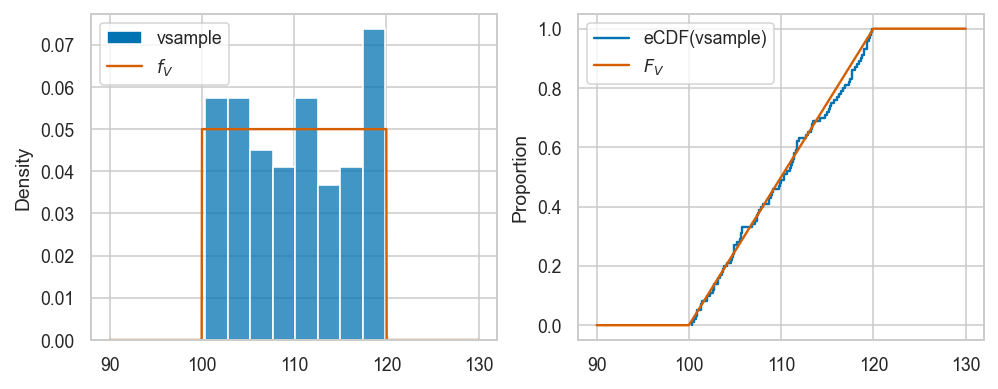

In [35]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
xs = np.linspace(90,130,1000)

# plot histogram of `vsample`
sns.histplot(vsample, stat="density", ax=axs[0], label="vsample")

# plot the pdf of rvV 
sns.lineplot(x=xs, y=rvV.pdf(xs), color="r", ax=axs[0], label="$f_V$")
lines, labels = axs[0].get_legend_handles_labels()
axs[0].legend(reversed(lines[0:2]), reversed(labels[0:2]))

# plot a empirical cumulative distribution
sns.ecdfplot(vsample, ax=axs[1], label="eCDF(vsample)")

# plot the CDF of rvV
sns.lineplot(x=xs, y=rvV.cdf(xs), color="r", ax=axs[1], label="$F_V$")
axs[1].set_ylim(-0.05, 1.05)

#### Exponential distribution

In [36]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)

Here is the code for visual comparison of `esample` and the theoretical model `rvE` $=\mathrm{Expon}(\lambda=0.2)$, based on the probability density and cumulative probability distributions.

(-0.05, 1.05)

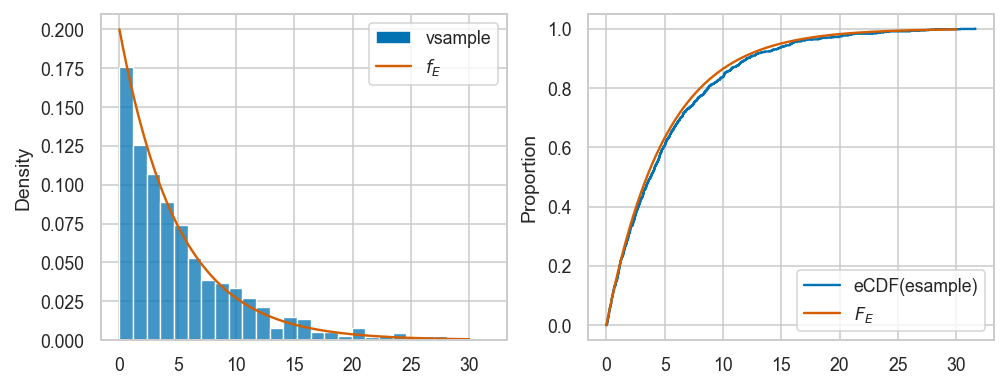

In [37]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
xs = np.linspace(0,30,1000)

# plot histogram of `esample`
sns.histplot(esample, stat="density", ax=axs[0], label="vsample")

# plot the pdf of rvE
sns.lineplot(x=xs, y=rvE.pdf(xs), color="r", ax=axs[0], label="$f_E$")
lines, labels = axs[0].get_legend_handles_labels()
axs[0].legend(reversed(lines[0:2]), reversed(labels[0:2]))

# plot a empirical cumulative distribution
sns.ecdfplot(esample, ax=axs[1], label="eCDF(esample)")

# plot the CDF of rvE
sns.lineplot(x=xs, y=rvE.cdf(xs), color="r", ax=axs[1], label="$F_E$")
axs[1].set_ylim(-0.05, 1.05)

### Using Q-Q plots to compare quantiles

The quantile-quantile plot `qqplot(data, dist)`
is used to compare the positions of the quantiles of the dataset `data`
against the quantiles of the theoretical distribution `dist`,
which is an instance of one of the probability models in `scipy.stats`.

The easiest way to generate a Q-Q plot is to use
the function `qqplot` defined in the the `statsmodels` package.

In [38]:
from statsmodels.graphics.api import qqplot

#### Examples of good fit


##### Normal data vs. the true normal model

Let's look at the quantiles of the data in `nsample`,
plotted versus the quantiles of the theoretical model $\mathcal{N}(1000,100)$.

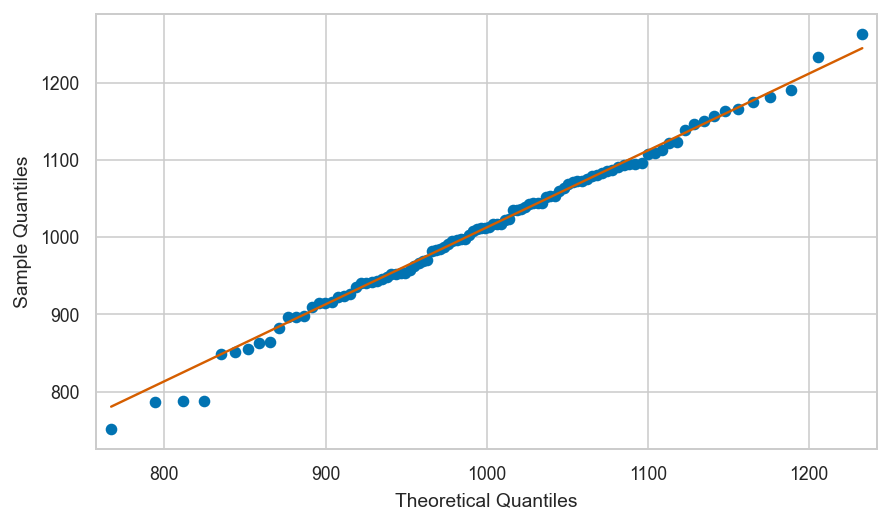

In [39]:
_ = qqplot(nsample, dist=norm(1000,100), line='q')

In [40]:
# filename = "figures/prob/qqplot_nsample_vs_norm1000_100.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(nsample, dist=norm(1000,100), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Normal data vs. the standard normal

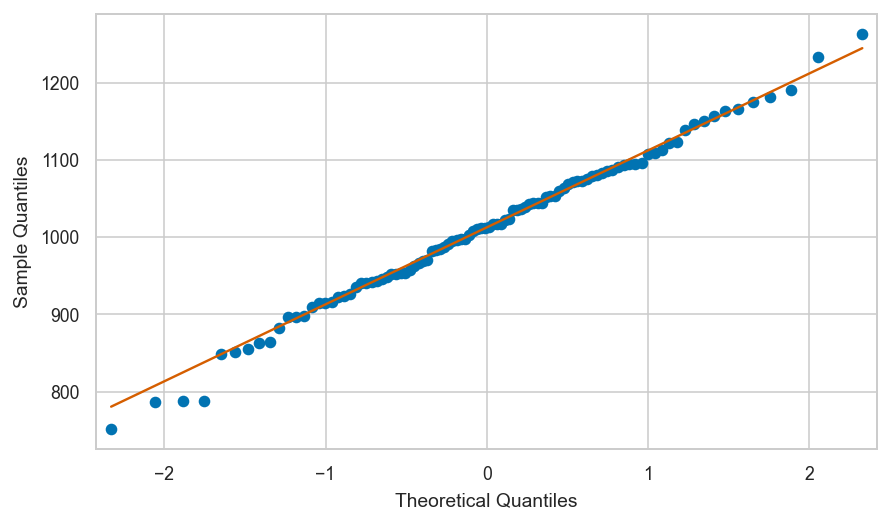

In [41]:
_ = qqplot(nsample, dist=norm(0,1), line='q')

In [42]:
# filename = "figures/prob/qqplot_nsample_vs_stdnorm.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(nsample, dist=norm(0,1), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Examples of bad fit

##### Shifted uniform data vs. standard normal

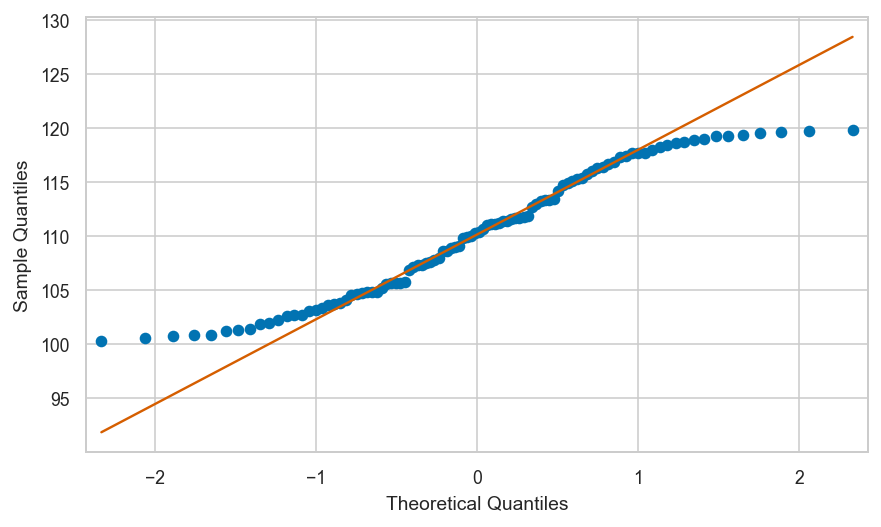

In [43]:
vsample = np.array(vsample)
_ = qqplot(vsample, dist=norm(0,1), line="q")

In [44]:
# filename = "figures/prob/qqplot_vsample_vs_stdnorm.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(vsample, dist=norm(0,1), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

##### Exponential data vs. standard normal

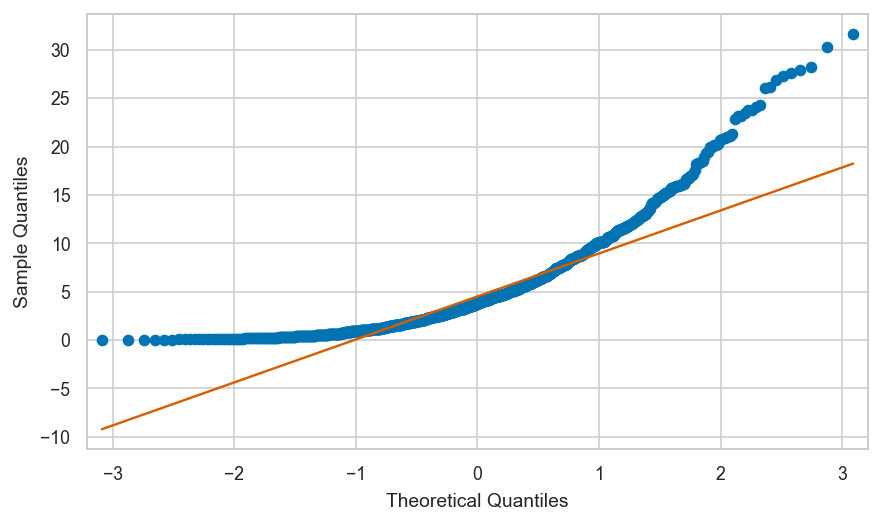

In [45]:
esample = np.array(esample)
_ = qqplot(esample, dist=norm(0,1), line="q")

Note the lowest quantiles don't match (exponential data limited to zero),
and the high quantiles don't match either (exponential data has a long tail).

In [46]:
# filename = "figures/prob/qqplot_esample_vs_stdnorm.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(esample, dist=norm(0,1), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Shifted uniform sample vs. true model

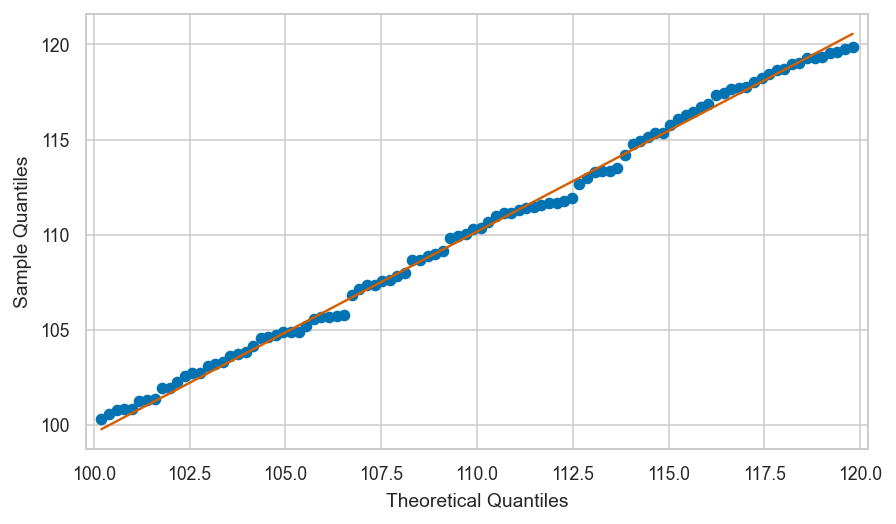

In [47]:
vsample = np.array(vsample)
_ = qqplot(vsample, dist=rvV, line="q")

In [48]:
# filename = "figures/prob/qqplot_vsample_vs_rvV.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(vsample, dist=rvV, line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Exponential sample vs. true exponential model

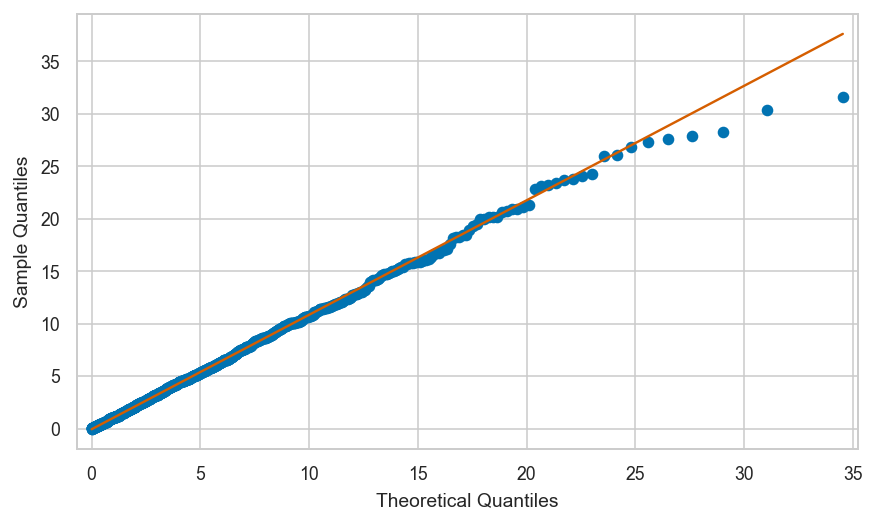

In [49]:
_ = qqplot(esample, dist=rvE, line="q")

In [50]:
# filename = "figures/prob/qqplot_esample_vs_rvE.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(esample, dist=rvE, line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Generating a Q-Q plot manually (bonus material)

If want to know how the Q-Q plot is generated,
you can look at the following function `qq_plot` which the same way as `qqplot`.

In [51]:
def qq_plot(sample, dist, line="q"):
    qs = np.linspace(0, 1, len(sample))
    xs = dist.ppf(qs)
    ys = np.quantile(sample, qs)
    ax = sns.scatterplot(x=xs, y=ys, alpha=0.2)
    if line == "q":
        # compute the parameters m and b for the diagonal
        xq25, xq75 = dist.ppf([0.25, 0.75])
        yq25, yq75 = np.quantile(sample, [0.25,0.75])
        m = (yq75-yq25)/(xq75-xq25)
        b = yq25 - m * xq25
        # add the line  y = m*x+b  to the plot
        linexs = np.linspace(min(xs[1:]),max(xs[:-1]))
        lineys = m*linexs + b
        sns.lineplot(x=linexs, y=lineys, ax=ax, color="r")
    return ax


In [52]:
# # ALT2. use the `probplot` from the `scipy.stats` module
# from scipy.stats import probplot
# _ = probplot(nsample, dist=norm(1000,100), plot=plt)

### Comparing moments

A simple way to measure how well the data sample $\mathbf{x} = (x_1, x_2, \ldots , x_n)$
fits the probability model $f_X$ is to check if the data distribution
and the probability distribution have the same moments.

In order to easily be able to calculate the moments of the data samples,
we'll convert `vsample` and `esample` into Pandas series objects,
which have all the necessary methods.


In [53]:
vseries = pd.Series(vsample)
eseries = pd.Series(esample)

#### Moments of uniform distribution

In [54]:
vseries.mean(), rvV.mean()

(110.21271847666772, 110.0)

In [55]:
vseries.var(), rvV.var()

(35.95736108409104, 33.33333333333333)

Let's now compare the [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) of dataset and the [skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution:

In [56]:
vseries.skew(), rvV.stats("s")

(0.03970716302600479, array(0.))

Finally,
let's compare the [kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html) of dataset and the [kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution.

In [57]:
vseries.kurt(), rvV.stats("k")

(-1.2584390506748377, array(-1.2))

#### Moments of exponential distribution

In [58]:
eseries.mean(), rvE.mean()

(5.343224374466268, 5.0)

In [59]:
eseries.var(), rvE.var()

(27.53085874882216, 25.0)

Let's now compare the [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) of dataset and the [skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution:

In [60]:
eseries.skew(), rvE.stats("s")

(1.7338627932228903, array(2.))

Finally,
let's compare the [kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html) of dataset and the [kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution.

In [61]:
eseries.kurt(), rvE.stats("k")

(3.557504048617028, array(6.))

#### Example of bad fit between higher moments

Define the random variable `rvNE` as the best normal approximation to random variable `rvE`.

In [62]:
rvNE = norm(5,5)
rvNE.mean(), rvNE.var()

(5.0, 25.0)

In [63]:
eseries.skew(), rvNE.stats("s")

(1.7338627932228903, array(0.))

In [64]:
eseries.kurt(), rvNE.stats("k")

(3.557504048617028, array(0.))

### Kolmogorov–Smirnov test

In [65]:
from scipy.stats import ks_1samp

Let's jump right ahead and compute the KS distance for the data and distribution of interest.

In [66]:
ks_1samp(nsample, rvN.cdf).statistic

0.07815466189999987

In [67]:
ks_1samp(esample, rvE.cdf).statistic

0.03597247001342496

In [68]:
ks_1samp(vsample, rvV.cdf).statistic

0.05707018183377044

#### Example of big distance

In [69]:
ks_1samp(esample, rvNE.cdf).statistic

0.15871546070321535

<AxesSubplot:ylabel='Proportion'>

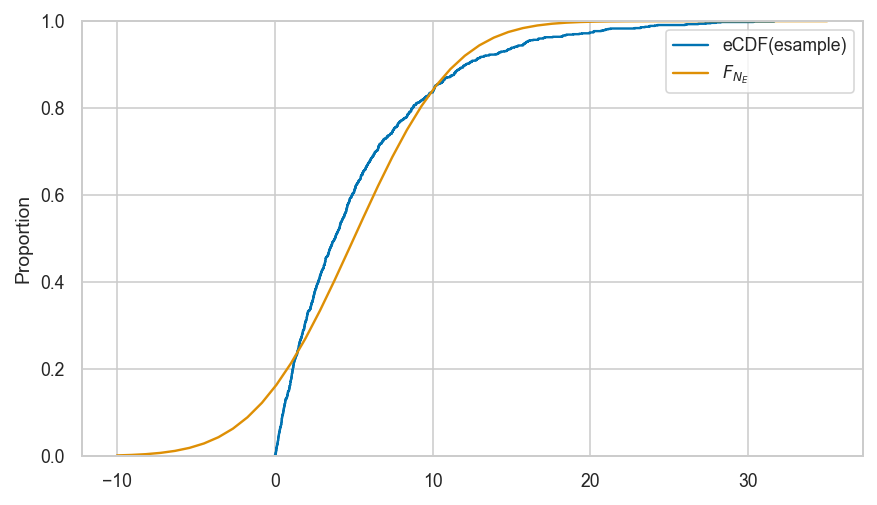

In [70]:
sns.ecdfplot(esample, label="eCDF(esample)")
bs = np.linspace(-10,35)
sns.lineplot(x=bs, y=rvNE.cdf(bs), label="$F_{N_E}$")

#### KS distances after standardization (optional)

Define the function `standardize` that transforms any dataset
so it will have mean zero, and standard deviation one.

In [71]:
def standardize(data):
    xbar = data.mean()
    s = data.std()
    return (data-xbar)/s

In [72]:
# ALT. Use existing function that does the same as `standardize`
from scipy.stats import zscore

We can now report the KS distances,
between the standardized version so `nsample`, `esample`, and `vsample` and
standard normal $\mathcal{N}(0,1)$,
to check how "normal" they are.

In [73]:
ks_1samp(zscore(nsample), norm(0,1).cdf).statistic

0.037541386171241364

In [74]:
ks_1samp(zscore(vsample), norm(0,1).cdf).statistic

0.10026891576437313

In [75]:
ks_1samp(zscore(esample), norm(0,1).cdf).statistic

0.15419311135216357

In [76]:
data = expon(0,10).rvs(100)
ks_1samp(zscore(data), norm(0,1).cdf).statistic

0.1781210103950946

#### Calculating the KS distance manually (optional)

The computation is a little tricky since the eCDF is a stepwise function,
so we need to two differences $|F_X(x_i) - F_{\mathbf{x}}(x_i)|$
and $|F_X(x_i) - F_{\mathbf{x}}(x_{i-1})|$.

In [77]:
def ks_dist(sample, rv=norm(0,1)):
    """
    Compute the KS distance between observed data in `sample`
    and the theoretical distribution of random variable `rv`.
    """
    sample = sorted(sample)
    ks_dists = []

    x0 = sample[0]
    ks_dist0 = rv.cdf(x0)
    ks_dists.append(ks_dist0)

    n = len(sample)
    for i in range(1,n):
        # xi
        xi = sample[i]
        eCDFxi = ecdf(sample, b=xi)
        ks_dist1 = abs(eCDFxi - rv.cdf(xi))
        ks_dists.append(ks_dist1)
        # x(i-1)
        xim1 = sample[i-1]
        eCDFxim1 = ecdf(sample, b=xim1)
        ks_dist2 = abs(eCDFxim1 - rv.cdf(xi))
        ks_dists.append(ks_dist2)

    # find max
    max_ks_dist = max(ks_dists)
    return max_ks_dist

##### Test 1

In [78]:
ks_dist(nsample, rv=norm(1000,100))

0.07815466189999987

In [79]:
ks_1samp(nsample, norm(1000,100).cdf).statistic

0.07815466189999987

##### Test 2

In [80]:
ks_dist(standardize(nsample), rv=norm(0,1))

0.037541386171241364

In [81]:
ks_1samp(standardize(nsample), norm(0,1).cdf).statistic

0.037541386171241364

## Bootstrap sample generation

In [82]:
from scipy.stats import norm
rvN = norm(1000, 100)

np.random.seed(72)
sample = rvN.rvs(30)
sample

array([1031.85454991,  932.04405655,  779.16115305, 1059.02401628,
       1167.47660438,  833.40440269,  917.56612626, 1054.52603422,
       1000.11861932,  924.29694777, 1062.95451919,  990.43682345,
        849.21393503,  949.99869847, 1171.40102725,  877.62327349,
       1139.59050836, 1041.44763431, 1151.96667669, 1139.0063404 ,
        891.5999061 ,  957.46318231,  937.81775307, 1145.86005158,
        872.50054515, 1112.86094852, 1179.05765281,  948.13164741,
        932.89197563, 1073.67607886])

In [83]:
print([round(val, 2) for val in sample[0:4]])

[1031.85, 932.04, 779.16, 1059.02]


In [84]:
sample.mean()

1004.1657229506349

Let's generate a bootstrap sample and compute its mean:

In [85]:
bsample = np.random.choice(sample,30)
bsample.mean()

989.8642131674898

Let's compute the means of $10$ bootstrap samples:

In [86]:
B = 10
bmeans = []
for k in range(0,B):
    bsample = np.random.choice(sample, 30)
    bmean = bsample.mean() 
    bmeans.append(bmean)

# bmeans

In [87]:
print([round(bmean, 2) for bmean in bmeans])

[1002.72, 968.09, 995.78, 964.45, 1011.08, 1013.17, 1027.03, 1041.01, 969.77, 1029.55]


In [88]:
max(abs(bmeans - sample.mean()))

39.719674810092215

In [89]:
# # BONUS: draw B=1000 bootstrap samples ot obtain a full histogram
# B = 1000
# bmeans = []
# for i in range(0,B):
#     bsample = np.random.choice(sample, 30)
#     bmean = bsample.mean() 
#     bmeans.append(bmean)

# ax = sns.histplot(bmeans, stat="density")
# ax.set_xlim(600,1400)

#### Clarification: empirical distribution of `sample` is not the same as $f_N$

(600.0, 1400.0)

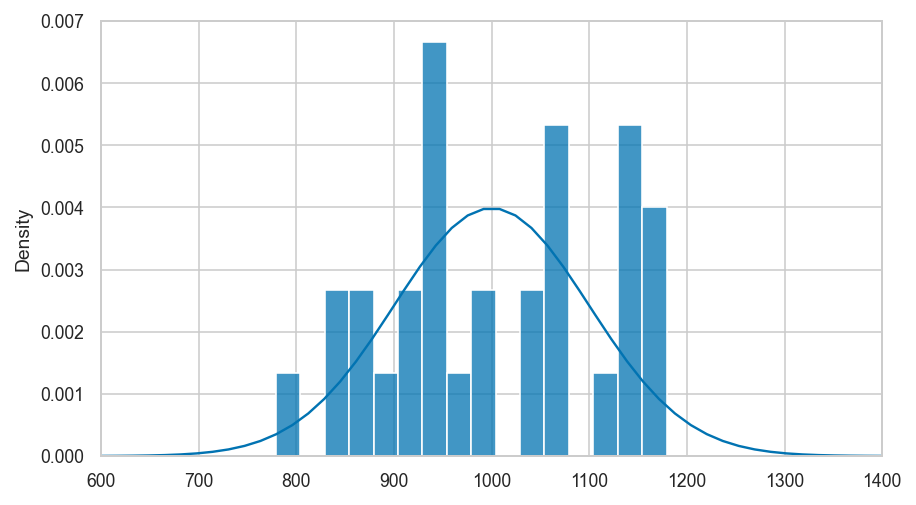

In [90]:
# plot the pmf of uknown distritbuon f_N
from scipy.stats import norm
rvN = norm(1000, 100)
xs = np.linspace(600,1400)
ax = sns.lineplot(x=xs, y=rvN.pdf(xs))

# plot histogram from a single samples of size 30
sns.histplot(sample, binwidth=25, stat="density", ax=ax)
ax.set_xlim(600,1400)

In [91]:
# filename = "figures/prob/bootstrap_sample_from_norm1000_100.pdf"
# with plt.rc_context({"figure.figsize":(5,3)}):
#     ax = sns.lineplot(x=xs, y=rvN.pdf(xs))
#     sns.histplot(sample, binwidth=25, ax=ax, stat="density")
#     ax.set_xlim(600,1400)
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

In [92]:
# TODO: stem plot of sample
# TODO: stem plot alpha=0.1 of bsamples

## Discussion